In [4]:
import matplotlib.pyplot as plt
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import matplotlib

In [5]:
#create function which checks the condition for the parameters of the protocol
def constcheck(mu, lmbda):
    if (2+9*mu)/(18*mu) < lmbda and lmbda < 1 :
        return 1
    else:
        return 0

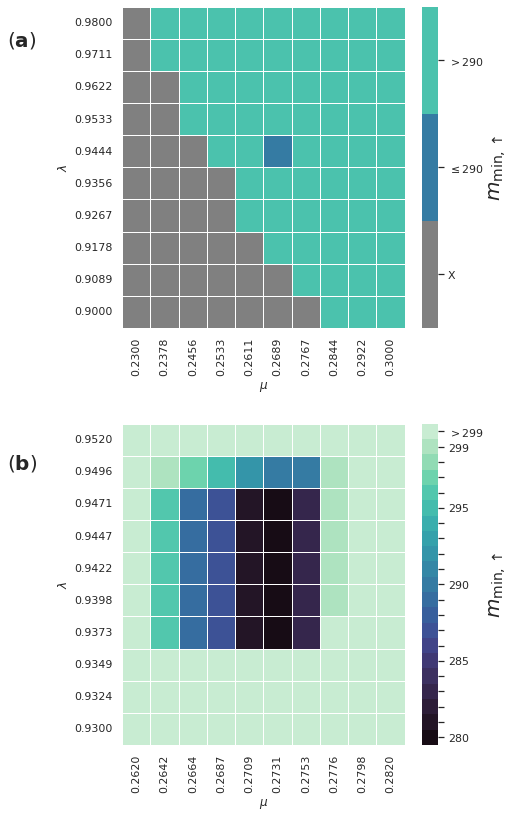

In [6]:
#create figure with two subplots
sns.set(rc={'figure.figsize':(7,12)})
fig, (ax1, ax2) = plt.subplots(nrows = 2,ncols= 1)

#parameter values for the fourthSim datafile
mus = np.linspace(0.23,0.30,10)
ls = np.linspace(0.9,0.98,10)

###FIRST SUBPLOT###

#read the data in fourthSim, resize it and obtain the m_min values for every parameter pair
datapoints = np.loadtxt("../datas/upperpanel_data.txt")

#create empty container for the data
data = np.zeros(len(mus)*len(ls)).reshape((len(mus),len(ls)))

#iterate through all the [mu,lambad,mmin] points
for p in datapoints: 
    mu, lmbda, val = p[0], p[1], p[2] #unpack values
    mui = np.where(mus == mu)[0][0] #find the position of mu in the mus list
    lmbdai = np.where(ls == lmbda)[0][0] #find the position of lambda in the lambdas list
    
    v = constcheck(mu,lmbda) #check if the point is in the domain or not
    if v == 0: 
        #if it is not then say that the value of m_min here is 280
        data[len(ls)-lmbdai-1,mui] = 280
    else: 
        #if it is in the domain then add the original m_min value here
        data[len(ls)-lmbdai-1,mui] = val

#create pandas dataframe
Cols = [mu for mu in mus]
Index = [l for l in ls]
Index.reverse()
df = DataFrame(data, index = Index, columns = Cols)

#set general plot parameters
plt.rcParams['font.size'] = 10
bg_color = (1,1,1)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.labelsize'] = 20

#create colorpallette with two colors from the "mako" palette
cmap = sns.color_palette("mako", 3)
#set the first color to grey
cmap[0] = "grey"

ticks = np.arange(data.min(), data.max()+5,10) #create ticks but later I reassign the labels
xlabels = ["%.4f" % mu for mu in mus] #x axis labels
ylabels = (np.array(["%.4f" % l for l in ls]))[::-1] #y axis labels
#create heatmap with df dataframe, cmap colors and colorbar kwargs,
#I slide the maximum and minimum values on the colorbar so that the ticks will be placed properly
dasd = sns.heatmap(df,cmap =cmap, cbar_kws={'label': r'$m_{\mathrm{min},\uparrow}$', 'ticks': ticks}, vmin = 275, vmax = 305,
            linewidths = 1,rasterized=True, yticklabels=ylabels, xticklabels = xlabels, ax=ax1)
#rotate the labels on the y axis 
ax1.set_yticklabels(ylabels, rotation=0)

#modify the colorbar
c_bar = dasd.collections[0].colorbar
#create new labels for the colorbar
labels = [0,0,0]
labels[1] = r"$\leq 290$" #first label
labels[2] = r"$> 290$" #second label
labels[0] = r"X"
c_bar.set_ticklabels(labels) #add the new modified labels

#add axis labels
ax1.set_ylabel(r"$\lambda$")
ax1.set_xlabel(r"$\mu$")


#SECOND SUBPLOT#
#parameter values for the fourthSim datafile
mus = np.linspace(0.262,0.282,10)
ls = np.linspace(0.93,0.952,10)

#read the data in fourthSim, resize it and obtain the m_min values for every parameter pair
datapoints = np.loadtxt("../datas/lowerpanel_data.txt")

#create empty container for the data
data = np.zeros(len(mus)*len(ls)).reshape((len(mus),len(ls)))

#iterate through all the [mu,lambad, mmin] points
for p in datapoints: 
    mu, lmbda, val = p[0], p[1], p[2] #unpack values
    mui = np.where(mus == mu)[0][0] #find the position of mu in the mus list
    lmbdai = np.where(ls == lmbda)[0][0] #find the position of lambda in the lambdas list
    
    v = constcheck(mu,lmbda) #check if the point is in the domain or not
    if v == 0:
        #if we are not in the domain set the value of m_min to 279
        data[len(ls)-lmbdai-1,mui] = 279
    else: 
        #if we are in the domain the use the original m_min value
        data[len(ls)-lmbdai-1,mui] = val

#set it to integer values
data = np.array(data,dtype = "int32")
        
#create pandas dataframe
Cols = [mu for mu in mus]
Index = [l for l in ls]
Index.reverse()
df = DataFrame(data, index = Index, columns = Cols)

#set general plot parameters
plt.rcParams['font.size'] = 10
bg_color = (1,1,1)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.labelsize'] = 20

#create colormap with the proper number of colors
cmap = sns.color_palette( "mako", data.max() - data.min() + 1 )
#set the first color to grey

#set the ticks on the colorbar according to the values in the dataframe
ticks = np.arange( data.min(), data.max() + 1 , 1 ) 

#create ticklabels for the axis
xlabels = ["%.4f" % mu for mu in mus] #x axis labels
ylabels = (np.array(["%.4f" % l for l in ls]))[::-1] #y axis labels

#create colormap as previously, shift the datapoints on the colorbar so that the ticks will be properly placed
dasd = sns.heatmap(df,cmap =cmap, cbar_kws={'label': r'$m_{\mathrm{min},\uparrow}$', 'ticks': ticks}, vmin = data.min() - 0.5, vmax = data.max() + 0.5,
            linewidths = 1, rasterized = True, yticklabels = ylabels, xticklabels = xlabels, ax = ax2)

#and now modify the last tick label on the colorbar to >299, previosly this ticklabel was set to 300! 
c_bar = dasd.collections[0].colorbar #obtained the colorbar object

labels = [str(i) for i in range(data.min(), data.max() + 1)] #create the list containing the colorbartick labels
for i in range(data.min(),data.max()):
    j = i-data.min()
    if j%5 != 0:
        labels[j] = ""
#modify the last few labels
labels[-1] = r"$>299$"
labels[-2] = r"$299$"

#assign the new labels
c_bar.set_ticklabels(labels) 

#rotate the labels on the y axis 
ax2.set_yticklabels(ylabels, rotation=0)

#create labels for the axis
ax2.set_ylabel(r"$\lambda$")
ax2.set_xlabel(r"$\mu$")

#place down (a) and (b) subplot markers to the proper location
a = 0.49
b = 0.08

plt.gcf().text(-0.04, 1-b, r'$(\mathbf{a})$', fontsize=20) #add (a)
plt.gcf().text(-0.04, 1-b-a, r'$(\mathbf{b})$', fontsize=20) #add (b)

plt.tight_layout(pad=3.0)
plt.savefig("../figures/2dgrid_mmin.pdf", bbox_inches='tight', format = "pdf", dpi = 1200)